# Evaluation Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.


### 1. 

**Load your zillow dataset.**


In [1]:
import pandas as pd
from wrangle import wrangle_zillow, check_columns
from prepare import encode_county, encode_county, split_data, robust_scaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

In [2]:
# Import and clean

df = wrangle_zillow()

In [3]:
# No exploration needed, encode county

df = encode_county(df)

In [4]:
# Split before scaling data

train, validate, test = split_data(df)

train: 1284141 (60% of 2140235)
validate: 428047 (20% of 2140235)
test: 428047 (20% of 2140235)


In [5]:
train.dtypes

year             int64
beds             int64
baths          float64
sqfeet           int64
prop_value       int64
prop_tax         int64
los_angeles       bool
orange            bool
ventura           bool
dtype: object

In [6]:
# Scale needed values for modeling, in this case, we'll just robust scale them all.

train = robust_scaler(train)
validate = robust_scaler(validate)
test = robust_scaler(test)

In [7]:
train

,year,beds,baths,sqfeet,prop_value,prop_tax,los_angeles,orange,ventura
1268902,0.703704,1.0,0.0,0.643533,0.142073,0.015750,False,True,False
613034,0.333333,0.0,0.5,0.370137,1.036708,0.770204,False,True,False
2040503,0.185185,1.0,0.0,0.181914,0.858821,1.877614,True,False,False
2045869,1.555556,0.0,0.5,1.034700,0.661765,0.578105,False,False,True
744180,-0.037037,1.0,0.0,0.177708,-0.357086,-0.396334,True,False,False
...,...,...,...,...,...,...,...,...,...
941799,-0.148148,-1.0,-1.0,-0.974763,-0.870109,-0.825200,True,False,False
631585,1.074074,0.0,1.0,0.481598,0.841746,0.827524,True,False,False
883917,-0.037037,0.0,0.0,0.125131,-0.382667,-0.413633,True,False,False
1253096,-1.259259,1.0,1.0,0.465825,0.835250,0.912987,True,False,False



### 2.

**Fit a linear regression model (ordinary least squares) and compute yhat, predictions of `prop_value` using only `sqfeet`.**

Modify and add to the code above as necessary for it to work with the zillow dataset.

Here is some sample code to get you started:

```python
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
```

In [8]:
from sklearn.linear_model import LinearRegression

# Select the 'sqfeet' and 'prop_value' columns from the 'train' dataframe
df1 = train[["sqfeet", "prop_value"]]

# Fit a linear regression model to the 'sqfeet' and 'prop_value' columns
lr = LinearRegression().fit(df1[["sqfeet"]], df1[["prop_value"]])

# Calculate the mean of the 'prop_value' column and assign it to the 'yhat_bl' column of the 'df1' dataframe
baseline = df1["prop_value"].copy().mean()
df1 = df1.assign(yhat_bl=baseline)

# Predict the 'prop_value' column using the linear regression model and assign it to the 'yhat' column of the 'df1' dataframe
df1 = df1.assign(yhat=lr.predict(df1[["sqfeet"]]))

### 3. 

**Plot the residuals for the linear regression model that you made.**

In [9]:
# Calculate the residuals for the baseline model and assign them to the 'res_bl' column of the 'df1' dataframe
df1 = df1.assign(res_bl=(df1["yhat_bl"] - df1["prop_value"]))

# Calculate the residuals for the model and assign them to the 'res' column of the 'df1' dataframe
df1 = df1.assign(res=(df1["yhat"] - df1["prop_value"]))

In [10]:
df1.head()

,sqfeet,prop_value,yhat_bl,yhat,res_bl,res
1268902,0.643533,0.142073,0.383517,0.616676,0.241444,0.474604
613034,0.370137,1.036708,0.383517,0.453089,-0.653191,-0.583618
2040503,0.181914,0.858821,0.383517,0.340466,-0.475304,-0.518355
2045869,1.034700,0.661765,0.383517,0.850731,-0.278249,0.188966
744180,0.177708,-0.357086,0.383517,0.337949,0.740603,0.695035


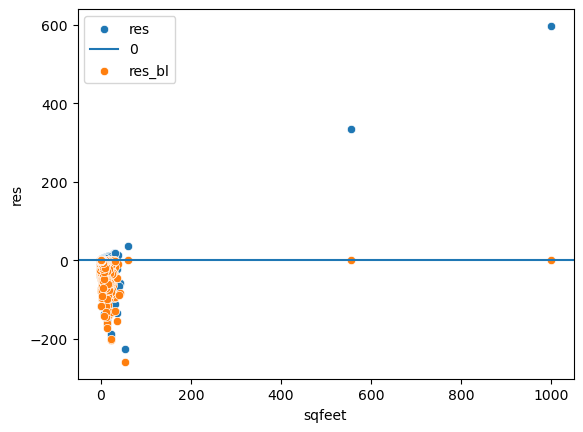

In [11]:
sns.scatterplot(data=df1, x="sqfeet", y="res")
plt.axhline(0)
sns.scatterplot(data=df1, x="sqfeet", y="res_bl")
plt.legend(loc="upper left", labels=["res", "0", "res_bl"])
plt.show()


### 4. 

**Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.**


In [12]:
# SSE, ESS, TSS, MSE, RMSE

# Calculate the mean squared error (MSE) between the 'prop_value' and 'yhat' columns of the 'df1' dataframe
MSE = mean_squared_error(df1.prop_value, df1.yhat)

# Calculate the sum of squared errors (SSE) by multiplying the MSE by the number of rows in the 'df1' dataframe
SSE = MSE * len(df1)

# Calculate the root mean squared error (RMSE) by taking the square root of the MSE
RMSE = MSE**0.5

# Calculate the explained sum of squares (ESS) by summing the squared differences between the 'yhat' column of the 'df1' dataframe and the baseline value
ESS = sum((df1.yhat - baseline) ** 2)

# Calculate the total sum of squares (TSS) by summing the ESS and SSE values
TSS = ESS + SSE

print("SSE = ", MSE)
print("MSE = ", SSE)
print("RMSE = ", RMSE)
print("ESS = ", ESS)
print("TSS = ", TSS)

SSE =  3.18618251853696
MSE =  4091507.6055365703
RMSE =  1.784988100390857
ESS =  950017.7892181757
TSS =  5041525.394754746



### 5. 

**Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).**


In [13]:
# SSE, MSE, RMSE

# Calculate the mean squared error (MSE) between the 'prop_value' and 'yhat_bl' columns of the 'df1' dataframe
MSE_bl = mean_squared_error(df1.prop_value, df1.yhat_bl)

# Calculate the sum of squared errors (SSE) by multiplying the MSE by the number of rows in the 'df1' dataframe
SSE_bl = MSE_bl * len(df1)

# Calculate the root mean squared error (RMSE) by taking the square root of the MSE
RMSE_bl = MSE_bl**0.5
print("SSE_bl = ", SSE_bl)
print("MSE_bl = ", MSE_bl)
print("RMSE_bl = ", RMSE_bl)

SSE_bl =  5041525.394753288
MSE_bl =  3.9259905218767157
RMSE_bl =  1.9814112450162171



### 6. 

**Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.**


In [14]:
# Create a pandas DataFrame called 'metrics' with columns for the metric name, error value for the model, and error value for the baseline
metrics = pd.DataFrame(
    {
        "metric": ["SSE", "MSE", "RMSE"],
        "error": [SSE, MSE, RMSE],
        "bl": [SSE_bl, MSE_bl, RMSE_bl],
    }
)

# Calculate the difference between the error value for the model and the error value for the baseline and assign it to the 'delta' column of the 'metrics' dataframe
metrics = metrics.assign(delta=(metrics.error - metrics.bl))

# Determine whether the model is better than the baseline by checking if the 'delta' value is less than 0 and assign the resulting boolean value to the 'better' column of the 'metrics' dataframe
metrics = metrics.assign(better=(metrics.delta < 0))

# Display the 'metrics' dataframe
metrics

,metric,error,bl,delta,better
0,SSE,4.091508e+06,5.041525e+06,-950017.789217,True
1,MSE,3.186183e+00,3.925991e+00,-0.739808,True
2,RMSE,1.784988e+00,1.981411e+00,-0.196423,True



### 7. 

**What is the amount of variance explained in your model?**


In [15]:
# Calculate the explained variance score (EVS) between the 'prop_value' and 'yhat' columns of the 'df1' dataframe
evs = explained_variance_score(df1["prop_value"], df1.yhat)

# Print the EVS rounded to 3 decimal places
print("Variance = ", round(evs, 3))

Variance =  0.188



### 8. 

**Is your model better than the baseline model?**

In [16]:
# Create a new dataframe called 'df2' with columns for 'sqfeet' and 'prop_value' from the 'validate' dataframe
df2 = validate[["sqfeet", "prop_value"]]

# Assign the baseline value to the 'yhat_bl' column of the 'df2' dataframe
df2 = df2.assign(yhat_bl=baseline)

# Use the linear regression model to predict the 'prop_value' column based on the 'sqfeet' column of the 'df2' dataframe and assign the resulting values to the 'yhat' column of the 'df2' dataframe
df2 = df2.assign(yhat=lr.predict(df2[["sqfeet"]]))

# Create a new dataframe called 'df3' with columns for 'sqfeet' and 'prop_value' from the 'validate' dataframe
df3 = validate[["sqfeet", "prop_value"]]

# Assign the baseline value to the 'yhat_bl' column of the 'df3' dataframe
df3 = df3.assign(yhat_bl=baseline)

# Use the linear regression model to predict the 'prop_value' column based on the 'sqfeet' column of the 'df3' dataframe and assign the resulting values to the 'yhat' column of the 'df3' dataframe
df3 = df3.assign(yhat=lr.predict(df3[["sqfeet"]]))

In [17]:
# Define the 'y' and 'yhat' variables
y = "prop_value"
yhat = "yhat"

# Calculate the mean squared error (MSE), sum of squared errors (SSE), and root mean squared error (RMSE) for the training set
tr_MSE = mean_squared_error(df1[y], df1[yhat])
tr_SSE = tr_MSE * len(df1)
tr_RMSE = tr_MSE**0.5

# Calculate the mean squared error (MSE), sum of squared errors (SSE), and root mean squared error (RMSE) for the training set using the baseline model
tr_MSE_bl = mean_squared_error(df1[y], df1[yhat])
tr_SSE_bl = tr_MSE_bl * len(df1)
tr_RMSE_bl = tr_MSE_bl**0.5

# Print whether the training model's SSE, MSE, and RMSE are better than the baseline model's SSE, MSE, and RMSE
print("Train Model SSE better than baseline: ", tr_SSE - tr_SSE_bl < 1)
print("Train Model MSE better than baseline: ", tr_MSE - tr_MSE_bl < 1)
print("Train Model RMSE better than baseline: ", tr_RMSE - tr_RMSE_bl < 1)

# Calculate the mean squared error (MSE), sum of squared errors (SSE), and root mean squared error (RMSE) for the validation set
v_MSE = mean_squared_error(df2[y], df2[yhat])
v_SSE = v_MSE * len(df2)
v_RMSE = v_MSE**0.5

# Calculate the mean squared error (MSE), sum of squared errors (SSE), and root mean squared error (RMSE) for the validation set using the baseline model
v_MSE_bl = mean_squared_error(df2[y], df2[yhat])
v_SSE_bl = v_MSE_bl * len(df2)
v_RMSE_bl = v_MSE_bl**0.5

# Print whether the validation model's SSE, MSE, and RMSE are better than the baseline model's SSE, MSE, and RMSE
print("Validate Model SSE better than baseline: ", v_SSE - v_SSE_bl < 1)
print("Validate Model MSE better than baseline: ", v_MSE - v_MSE_bl < 1)
print("Validate Model RMSE better than baseline: ", v_RMSE - v_RMSE_bl < 1)

# Calculate the mean squared error (MSE), sum of squared errors (SSE), and root mean squared error (RMSE) for the test set
t_MSE = mean_squared_error(df3[y], df3[yhat])
t_SSE = t_MSE * len(df3)
t_RMSE = t_MSE**0.5

# Calculate the mean squared error (MSE), sum of squared errors (SSE), and root mean squared error (RMSE) for the test set using the baseline model
t_MSE_bl = mean_squared_error(df3[y], df3[yhat])
t_SSE_bl = t_MSE_bl * len(df3)
t_RMSE_bl = t_MSE_bl**0.5

# Print whether the test model's SSE, MSE, and RMSE are better than the baseline model's SSE, MSE, and RMSE
print("Test Model SSE better than baseline: ", t_SSE - t_SSE_bl < 1)
print("Test Model MSE better than baseline: ", t_MSE - t_MSE_bl < 1)
print("Test Model RMSE better than baseline: ", t_RMSE - t_RMSE_bl < 1)

Train Model SSE better than baseline:  True
Train Model MSE better than baseline:  True
Train Model RMSE better than baseline:  True
Validate Model SSE better than baseline:  True
Validate Model MSE better than baseline:  True
Validate Model RMSE better than baseline:  True
Test Model SSE better than baseline:  True
Test Model MSE better than baseline:  True
Test Model RMSE better than baseline:  True


In [18]:
import scipy.stats as stats

slope, intercept, r, p, se = stats.linregress(df1["sqfeet"], df1["prop_value"])
sts = pd.DataFrame(
    [["slope", "intercept", "r", "p", "se"], [slope, intercept, r, p, se]]
)
sts

,0,1,2,3,4
0,slope,intercept,r,p,se
1,0.598351,0.231618,0.434095,0.0,0.001096


                            OLS Regression Results                            
Dep. Variable:                 sqfeet   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                 6.546e+05
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:24:44   Log-Likelihood:            -1.7964e+07
No. Observations:             2140235   AIC:                         3.593e+07
Df Residuals:                 2140233   BIC:                         3.593e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1460.9629      0.884   1652.916      0.0

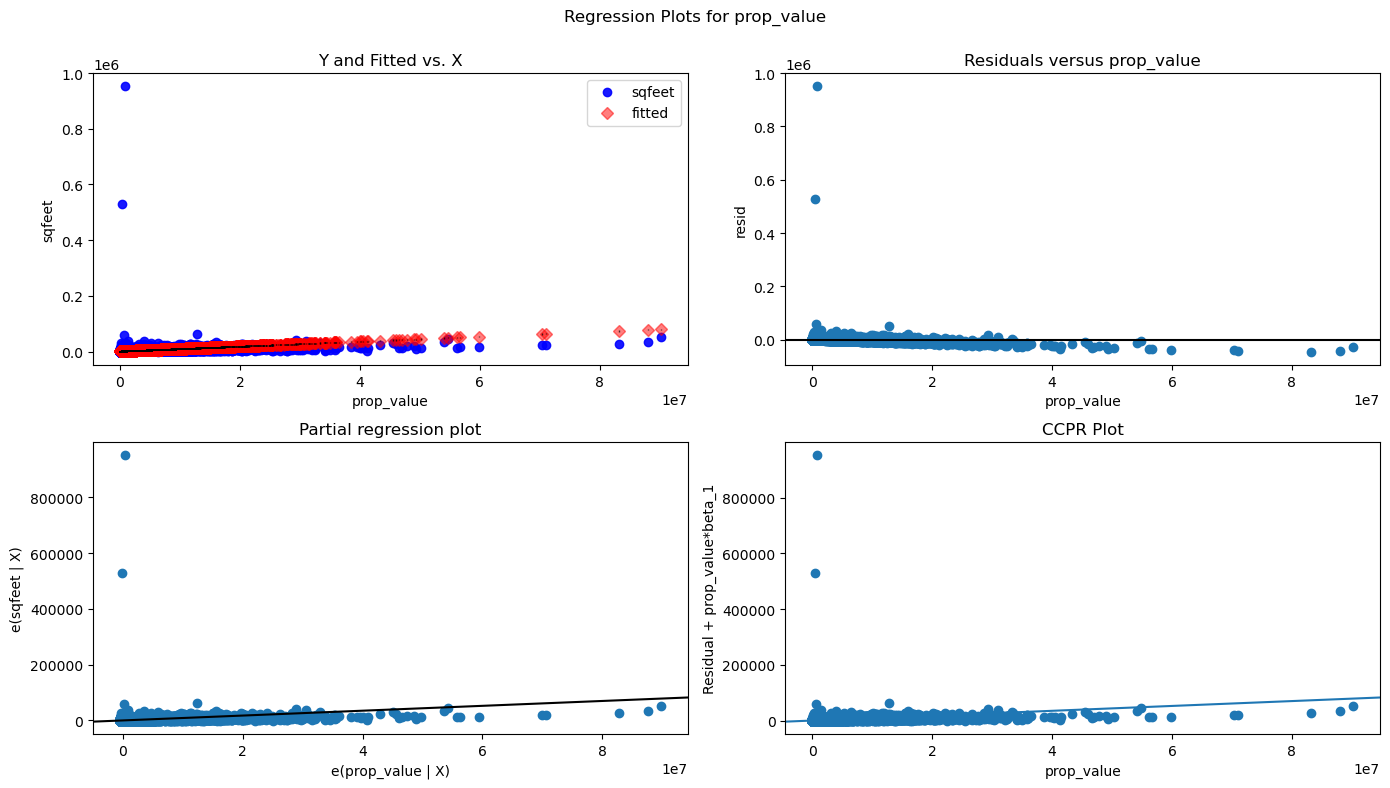

In [19]:
# import packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
data = wrangle_zillow()
  
# fit simple linear regression model
linear_model = ols('sqfeet ~ prop_value',
                   data=data).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    'prop_value',
                                    fig=fig)

                            OLS Regression Results                            
Dep. Variable:                 sqfeet   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                 6.546e+05
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:23   Log-Likelihood:            -3.2897e+06
No. Observations:             2140235   AIC:                         6.579e+06
Df Residuals:                 2140233   BIC:                         6.579e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1312      0.001    167.371      0.0

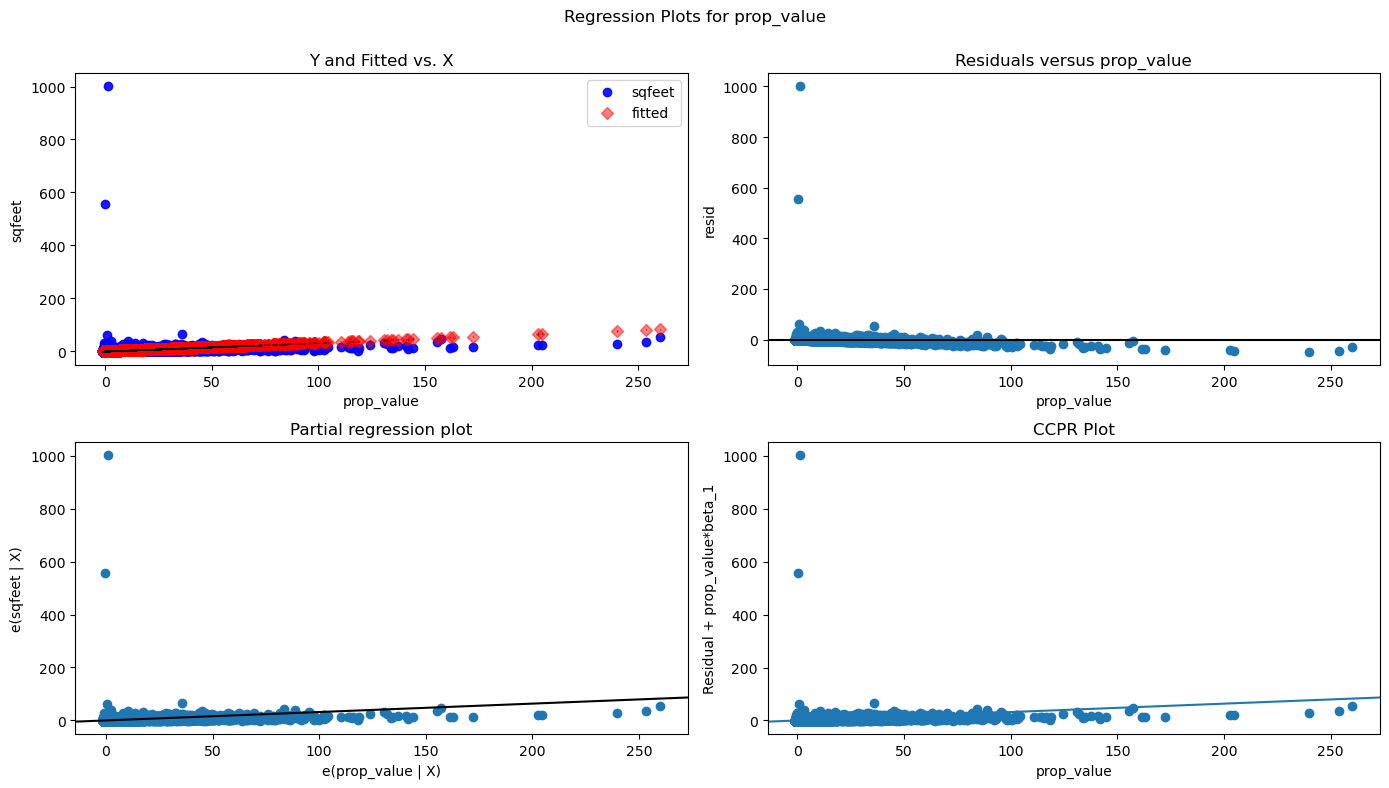

In [20]:
data2 = wrangle_zillow()
data2 = robust_scaler(data2)
  
# fit simple linear regression model
linear_model = ols('sqfeet ~ prop_value',
                   data=data2).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    'prop_value',
                                    fig=fig)

### 9. 

**Create a file named evaluate.py that contains the following functions.**



- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false